In [1]:
import xarray as xr
import cftime 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import os
import time
import logging
import cartopy.crs as ccrs
import metpy  
import calendar
import argparse
import glob
import geopandas
from geodatasets import get_path
import seaborn as sns

In [14]:
### read in cru vegc data
canesm5_all = pd.read_csv("../test_parallel_run/amazon_loop_output_vegc_soilc_historical.csv")
### read in model vegc data
# canesm5 = pd.read_csv("condensed_variables_VEGC.csv")
cru = pd.read_csv("all_vegc.csv")
cru_soil = pd.read_csv("all_vegc.csv")



In [15]:
# canesm5

# cru.loc[cru['year'].between(1700, 1720)]
canesm5_all.loc[0]

Unnamed: 0               0
year                  1501
lon                  -73.0
lat                  -46.0
variable             VEGC 
current_veg             10
cohort_area          25608
land_area            25884
value           105.393333
temp            2698912.48
value_weight    105.393333
Name: 0, dtype: object

In [6]:
#### isolate amazon region 
plot_data_cru =  cru.loc[(cru['lon'].between(-73,-53 )) 
                        &
                       (cru['lat'].between(-10,0))
                & (cru['ipft'] == 15)
               &(cru['year'].between(1700, 1720))
               ]


plot_data_model =  canesm5_all.loc[(canesm5_all['lon'].between(-73,-53 )) 
                        & (canesm5_all['variable']==' VEGC ')
                   &    (canesm5_all['lat'].between(-10,0))
                & (canesm5_all['current_veg'] == 16)
               &(canesm5_all['year'].between(1700, 1720))
               ]
print(len(plot_data_cru))
print(len(plot_data_model))

14934
17136


In [27]:
plot_data = plot_data_model.merge(plot_data_cru, on = ['lon','lat','year'])
plot_data['dif_cru'] = plot_data['monthly_mean'] - plot_data.groupby(['lon', 'lat'])['monthly_mean'].shift() 
plot_data['dif_canesma'] = plot_data['value_weight'] - plot_data.groupby(['lon', 'lat'])['value_weight'].shift() 

Text(0.5, 0.98, 'Annual % change in Vegetation Carbon Stocks')

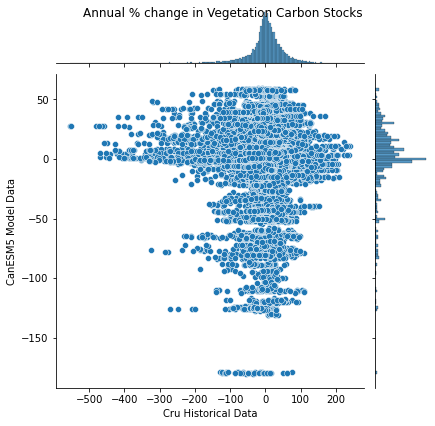

In [28]:
# sns.jointplot(data=plot_data.loc[
#                         (plot_data[].between())
#     &()
#                         ]
#               , x="dif_cru", y="dif_canesma")

jointplot = sns.jointplot(data=plot_data
              , x="dif_cru", y="dif_canesma")

jointplot.ax_joint.set_xlabel("Cru Historical Data")
jointplot.ax_joint.set_ylabel("CanESM5 Model Data")
jointplot.fig.suptitle("Annual % change in Vegetation Carbon Stocks")
#### delta S = f (env), or delta S = f(env, S)

Text(0.5, 0.98, 'Vegetation Carbon Stocks gC/m2')

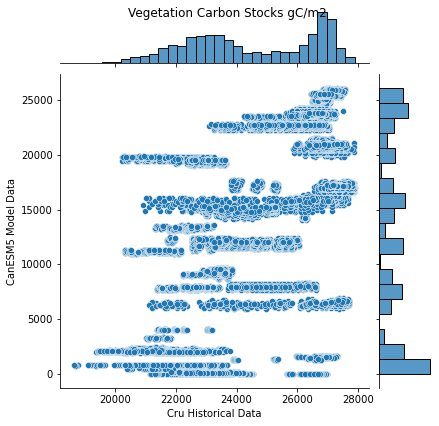

In [21]:
# plot_data_model['monthly_mean'].hist() 
joint_plot = sns.jointplot(data=plot_data, x="monthly_mean", y="value_weight")
##calc the block average and medium 
##show a box plot, include the standard deviation 

joint_plot.ax_joint.set_xlabel("Cru Historical Data")
joint_plot.ax_joint.set_ylabel("CanESM5 Model Data")
joint_plot.fig.suptitle("Vegetation Carbon Stocks gC/m2")


In [13]:
plot_data.loc[plot_data['value_weight'].between(700, 900), 'value_weight'].value_counts()

752.830833    2
805.891559    1
765.480445    1
804.516793    1
759.210024    1
             ..
753.546126    1
721.551355    1
724.235000    1
724.385833    1
761.337279    1
Name: value_weight, Length: 474, dtype: int64

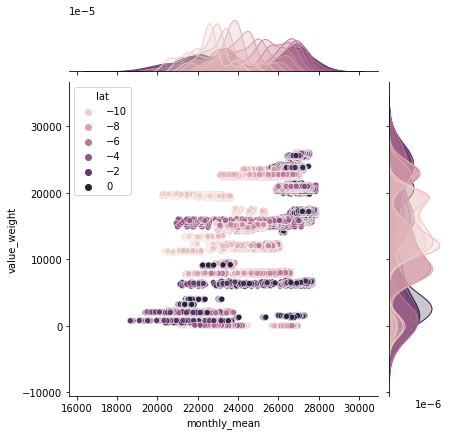

In [39]:
sns.jointplot(data=plot_data, x="monthly_mean", y="value_weight", hue='lat')

In [24]:
#### isolate amazon region 
plot_data_cru =  cru_soil.loc[(cru_soil['lon'].between(-73,-53 )) 
                        &
                       (cru_soil['lat'].between(-10,0))
                & (cru_soil['ipft'] == 15)
               &(cru_soil['year'].between(1700, 1720))
               ]


plot_data_model =  canesm5_all.loc[(canesm5_all['lon'].between(-73,-53 )) 
                        & (canesm5_all['variable']==' SOILORGC ')
                   &    (canesm5_all['lat'].between(-10,0))
                & (canesm5_all['current_veg'] == 16)
               &(canesm5_all['year'].between(1700, 1720))
               ]
print(len(plot_data_cru))
print(len(plot_data_model))

plot_data = plot_data_model.merge(plot_data_cru, on = ['lon','lat','year'])
plot_data['dif_cru'] = plot_data['monthly_mean'] / plot_data.groupby(['lon', 'lat'])['monthly_mean'].shift() - 1
plot_data['dif_canesma'] = plot_data['value_weight'] / plot_data.groupby(['lon', 'lat'])['value_weight'].shift() - 1

14934
17136


Text(0.5, 0.98, 'Annual % change in Vegetation Carbon Stocks')

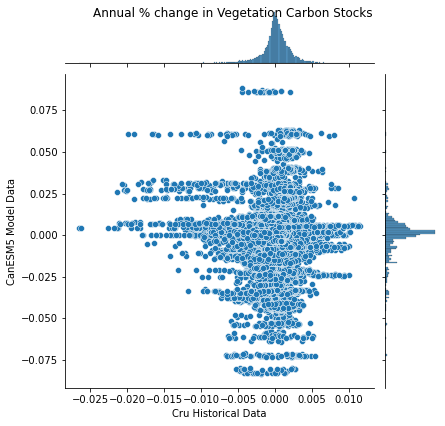

In [25]:
# sns.jointplot(data=plot_data.loc[
#                         (plot_data[].between())
#     &()
#                         ]
#               , x="dif_cru", y="dif_canesma")

jointplot = sns.jointplot(data=plot_data
              , x="dif_cru", y="dif_canesma")

jointplot.ax_joint.set_xlabel("Cru Historical Data")
jointplot.ax_joint.set_ylabel("CanESM5 Model Data")
jointplot.fig.suptitle("Annual % change in Soil Carbon Stocks")


Text(0.5, 0.98, 'Soil Carbon Stocks gC/m2')

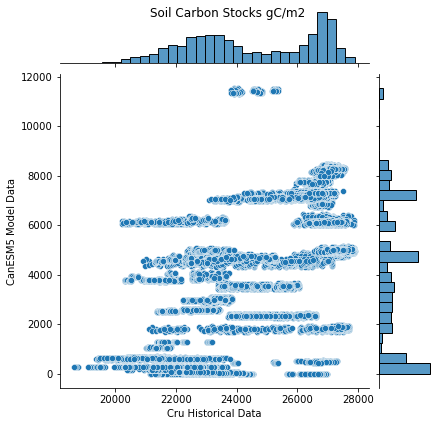

In [26]:
# plot_data_model['monthly_mean'].hist() 
joint_plot = sns.jointplot(data=plot_data, x="monthly_mean", y="value_weight")
##calc the block average and medium 
##show a box plot, include the standard deviation 

joint_plot.ax_joint.set_xlabel("Cru Historical Data")
joint_plot.ax_joint.set_ylabel("CanESM5 Model Data")
joint_plot.fig.suptitle("Soil Carbon Stocks gC/m2")
